
<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

***
__Part A Solution__:

To find the probability that you roll a five, must use the law of total probability.
$$P(R_5) = P(R_5\mid S)*P(S) + P(R_5 \mid F)*P(F) + P(R_5 \mid T)*P(T)$$
In plain English, this means taking the probability of rolling a 5 with each die, times the prob of picking that type of die, and adding these all together.
$$\text{n = 40 (total amount of dice in the bag)}\\
P(S) = \frac{10}{n} = \frac{1}{4}\\
P(T) = \frac{2}{n} = \frac{1}{20}\\
P(F) = \frac{28}{n} = \frac{7}{10}$$

To find the probability of picking each class of dice, take the number of dice possible to pick, and divide by the total number of dice in the bag.  This is assuming that the die picking from the bag is completely random.

$$ 
P(R_5 \mid S) = \frac{1}{6}\\
P(R_5 \mid T) = \frac{1}{20}\\
P(R_5 \mid F) = 0
$$

The probability f rolling a 5, on the condition that you pick that die is just 1 over the number of sides on that die.  This is the chance of rolling a 5 (one specific face of the die) out of the total number of faces on that die.

Putting it all together in the LTP:
$$ P(R_5) = \frac{1}{4} * \frac{1}{6} + \frac{1}{20} * \frac{1}{20} + \frac{7}{10} * 0 = \frac{1}{24} + \frac{1}{400} = \frac{53}{1200} \approx 0.04417$$
***

In [3]:
#check on the math of the problem above
ps = 1/4
pt = 1/20
pf = 7/10
p5s = 1/6
p5f = 0
p5t = 1/20
p5s*ps + p5f *pf + p5t *pt
#simulationcheck
import random
bagofdice = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,20,20]
random.choice(bagofdice)
def chancefive(n):
    gotfive = 0
    for i in range(n):
        if(random.randint(1, random.choice(bagofdice)) == 5):
            gotfive+=1
    return gotfive/n

print(f"Part A Simulation on 10 E 6 trials = {chancefive(1000000)}")

Part A Simulation on 10 E 6 trials = 0.043989


***
__Part A Code Summary__:

After a large number of trials in the simulation of the problem above, the answer is approximate to the calculated answer. Test confirms hand-written solution for part A
***

**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

***
__Part B Solution__:
We want to find $$P(S \mid R_5) = \frac{P(S \cap R_5)}{P(R_5)}$$
From __Part A__: 
$$P(R_5) = \frac{53}{1200}$$
Also know that 
$$
    P(S \cap R_5) = P(R_5 \cap S) = P(R_5 \mid S)*P(S)\\
    P(R_5 \mid S) = \frac{1}{6}\\
    P(S) = \frac{1}{4}\\
    \therefore P(S \cap R_5) = \frac{1}{24}
$$
So finally:

$$
    P(S \mid R_5) = \frac{\frac{1}{24}}{\frac{53}{1200}} = \frac{50}{53} \approx 0.9434\\
$$
***

In [4]:
def sixgivenfive(n):
    isasixgivenfive = 0
    isfive = 0
    for i in range(n):
        dicepicked = random.choice(bagofdice)
        numrolled = random.randint(1, dicepicked)
        if(numrolled == 5):
                isfive+=1
        if(numrolled == 5 and dicepicked == 6):
            isasixgivenfive += 1
    return isasixgivenfive/isfive

print(f"Part B Simulation on 10 E 6 trials = {sixgivenfive(1000000)}")

Part B Simulation on 10 E 6 trials = 0.9436299349143076


***
__Part B Code Summary__:

After a large number of trials in the simulation of the problem above, the answer is approximate to the calculated answer. Test confirms hand-written solution for part B.
***

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

***
__Part C Solution__:
To verify independence of these events we check against one of the formulas listed below:
$$
    P(R_5 \mid S) = P(R_5)\\
    or\\
    P(S \mid R_5) = P(S)\\
    or\\
    P(R_5 \cap S) = P(R_5)*P(S)
$$
Using the second formula:
$$
    P(S \mid R_5) = P(S)\\
    P(S \mid R_5) = \frac{50}{53} \implies \text{(from part B)}\\
    P(S) = \frac{1}{4} \implies \text{(from part A)}\\
    \frac{50}{53} \neq \frac{1}{4}
$$
This shows that the events are not independent.
***

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

***
__Part D Solution__:

Eventually we are going to be plugging in to this equation: 
$$
    P(F \mid E_1) = \frac{P(F \cap E_1)}{P(E_1)} \tag{1.1}
$$
***
$$
    P(E_1) = P(R_1) + P(R_2) + P(R_3) + P(R_4)
$$
***
Using the LPT as shown in the first example, calculate the prob of rolling each number {1, 2, 3, 4}
***
Start by using $R_1$ as an example
$$
\text{n = 40 (total amount of dice in the bag)}\\
P(S) = \frac{10}{n} = \frac{1}{4}\\
P(T) = \frac{2}{n} = \frac{1}{20}\\
P(F) = \frac{28}{n} = \frac{7}{10}
$$
***
$$ 
P(R_1 \mid S) = \frac{1}{6}\\
P(R_1 \mid T) = \frac{1}{20}\\
P(R_1 \mid F) = \frac{1}{4}
$$
Then use the LPT:
$$
    P(R_1) = \left(\frac{1}{4} * \frac{1}{6}\right) + \left(\frac{1}{20} * \frac{1}{20}\right) + \left(\frac{7}{10} * \frac{1}{4}\right) = \frac{1}{24} + \frac{1}{400} + \frac{7}{40}= \frac{263}{1200} \approx 0.2192
$$

We know also that $P(R_1)=P(R_2)=P(R_3)=P(R_4)$ because all of the conditional probabilities are the same for each type of die.  That is, each die contains these numbers, with an equal amount of chance to roll each one.

From this information we can assume that 
$$
    P(E_1) = P(R_1) * 4 \\
    P(E_1) = \frac{263}{300} \approx 0.8767  \tag{1.2}
$$
***
Now we work on finding
$$
    P(F \cap E_1)
$$
so that we can plug into the eq 1.1 and get the final answer.
Like in the previous problem (Part C) we swap the two events in the intersection and use this equation:
$$
    P(E_1 \cap F) = P(E_1 \mid F)*P(F) \tag{1.3}
$$
We can easily find $P(E_1 \mid F)$ because given that the die is a four-sided, the event that it is 1, 2, 3, or 4 is 100%. This is because the event equals exactly the sample space of possible rolls for the four sided die.
We also know that $P(F) = \frac{7}{10}$
***
So finally, we know that 
$$
    P(F \cap E_1) = \frac{7}{10}
$$
and 
$$
    P(E_1) = \frac{263}{300} \approx 0.8767
$$

When plugging this all into the eq 1.1, we find that 
$$
    P(F \mid E_1) = \frac{210}{263} \approx 0.7985
$$
***

In [5]:
def fgivene1(n):
    e1happened = 0
    fgivene1happened = 0
    for i in range(n):
        dicepicked = random.choice(bagofdice)
        numrolled = random.randint(1, dicepicked)
        if(numrolled <= 4 and numrolled >= 1):
            e1happened += 1
            if(dicepicked == 4):
                fgivene1happened += 1
    return fgivene1happened/e1happened

print(f"Part D Simulation on 10 E 6 trials = {fgivene1(1000000)}")

Part D Simulation on 10 E 6 trials = 0.7983943742634417


***
__Part D Code Summary__:

After a large number of trials in the simulation of the problem above, the answer is approximate to the calculated answer. Test confirms hand-written solution for part D.
***

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

***
__Part E by Hand Solution__:

$P(E_n)$ can be determined using the law of total probability.
For example 
$$
    P(E_1) = P(E_1 \mid S)*P(S) + P(E_1 \mid T)*P(T) + P(E_1 \mid F)*P(F)
$$ 

In this case:

$$
    P(E_1) = \left(\frac{4}{6} * \frac{1}{4}\right) + \left(\frac{1}{20} * \frac{4}{20}\right) + \left(\frac{1}{1} * \frac{7}{10}\right) = \frac{210}{263}
$$

This matches with our answer from part D. That's the easy part. Now expanding this to $E_n$, if the die __D__ has __m__ sides, the chance of that particular die having the outcome $E_n$ which can be written as $P(E_n | D_m)$, is just the probability of that particular die rolling $E_1$ __n__ times in a row. Since the die rolls are independent of each other, we can just take the product rule for the chance of getting an outcome within $[1,4]$ for example in the case of $D_m = S$

$$
    P(E_n \mid S) = \left(\frac{4}{6}\right)^n\\
    P(E_n \mid S) * P(S) = \left(\frac{4}{6}\right)^n * \frac{1}{4}
$$

This same method can be applied for the other dice, and eventually we get:

$$
    P(E_n) = \left(\frac{4}{6}\right)^n * \frac{1}{4} + \left(\frac{4}{20}\right)^n * \frac{1}{20} + \left(\frac{1}{1}\right)^n * \frac{7}{10}
$$

Now, to get our final answer for this problem $P(F \mid E_n)$ We use this final equation:

$$
    P(F \mid E_n) = \frac{P(F \cap E_n)}{P(E_n)}\\
    P(F \cap E_n) = P(E_n \cap F) = P(E_n \mid F)*P(F)\\
    P(E_n \mid F) = 1\\
    P(F \cap E_n) = P(F) = \frac{7}{10}\\
    P(F \mid E_n) = \frac{P(F \cap E_n)}{P(E_n)} = \frac{\frac{7}{10}}{P(E_n)}\\
$$

And our final answer plugging in $P(E_n)$:

$$
    P(F \mid E_n) = \frac{P(F \cap E_n)}{P(E_n)} = \frac{\frac{7}{10}}{\left(\frac{4}{6}\right)^n * \frac{1}{4} + \left(\frac{4}{20}\right)^n * \frac{1}{20} + \left(\frac{1}{1}\right)^n * \frac{7}{10}}\\
$$
***

In [6]:
def prob_four(n):
    #n = 1
    top = 7/10
    bottom = (1/20)*((4/20)**n) + (1/4)*((4/6)**n)+ (7/10)*1
    return top/bottom

***
__Part E Code Summary__:

We just plug the exact mathematical solution computed by hand into a function that returns the probability that our die is a four-sider after having n rolls in a row in the event space $[1,4]$
***

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [7]:
def find95confident():
    prob = prob_four(1)
    n = 1
    while(prob < 0.95):
        n += 1
        prob = prob_four(n)
    return n

print(f"First value of n where prob is > 0.95 is n = {find95confident()}")

First value of n where prob is > 0.95 is n = 5


***
__Part F Code Summary__:

After running our prob-four function with higher and higher values for n, we get the first n where if all of the previous rolls are in the event space, we are 95% confident that our die is a four-sider.
***

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

***
__Part A Solution__:

The chance that he ends up at the library after visiting one other location can be put into English in this way:

It is the chance of him choosing a first destination that connects both Node(E) and Node(L), __AND__ from there traveling to (L).  

Since there are two nodes that would lead him there, G and C, we know that he can take Path(Edge(E, G), Edge(G, L)) __OR__ Path(Edge(E, C), Edge(C, L))

Because the path choices are independent from one another we can treat the __AND__ and the __OR__ as $*$ and $+$ respectively.

This means that:

$$
    P(Path[1][1] == L) = P(Edge(E, G) * P(P(Edge(G, L)) + P(Edge(E, C)) * P(Edge(C, L)))
$$

The probabilities for the edges depend on how many possible edges there are to travel from the __Start__ node. (NOTE!!! Edge(E, R) and Edge(R, E) will __NOT__ have the same value.)

Node(E) connects with 4 edges, Node(G) with 4 edges, and Node(C) with 3 edges, where each of the edges are equally likely to be picked. This means we can write our previous equation as:
$$
    P(Path[1][1] == L) = \left(\frac{1}{4} * \frac{1}{4}\right) + \left(\frac{1}{4} * \frac{1}{3}\right)\\
$$

Final answer:

$$
    P(Path[1][1] == L) = \frac{1}{16} + \frac{1}{12} \approx 0.1458
$$
***

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

***
__Part B Solutions__:

Using the same logic from part A, Stella's possible path that leads to success on the first location is
$$
    P_1 = Path(Edge(R, G)) \tag{first location success}
$$

And for a two location success:

$$
    P_2 = Path(Edge(R, E), Edge(E, G))\tag{two location success}
$$

So the prob that she ends up there on a first location success __OR__ a second location success is:

$$
    P(P_1 \cup P_2) = P(P_1) + P(P_2)
$$

The starting nodes for all of the paths are either R or E. R has 2 connections, E has 4 connections, so using the exact same logic from part A:

$$
    P(P_1 \cup P_2) = \frac{1}{2} + \left(\frac{1}{2}*\frac{1}{4}\right)
$$

Final answer Part B:

$$
    P(P_1 \cup P_2) = \frac{5}{8} = 0.625
$$
***

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

***
__Part C Solutions__:

Note: because movements are independent we consider __AND__ == *, __OR__ == +

1.) The probability that they run into each other in the same location on the first location visited?

The solution to this is the probability that Oscar __AND__ Stella both choose a node that they have in common.

Nodes that separate E and H by one space are the nodes that they have in common, which are G, L, and C

***

Based on the common nodes, Oscar's Sample Space for possible paths for part 1C $P_1$:

$$
    \Omega_{P_1} = {Path(Edge(E, G)), Path(Edge(E, L)), Path(Edge(E, C))}
$$

Based on what we've considered in the last two parts, the probability for each outcome in this sample space are equal because they all share the same starting node.  Since E has 4 edges attached to it, prob for all outcomes in $\Omega_{P_1}$ is $\frac{1}{4}$

***

Stella's Sapmle space:

$$
    \Omega_{P_1} = {Path(Edge(H, G)), Path(Edge(H, L)), Path(Edge(H, C))}
$$

Stella's starting node H has 3 edges attached to it therefore all outcomes in $\Omega_{P_1}$ have prob $\frac{1}{3}$

***

The event __Meet(Dest)__ is defined as a movement where Oscar ends at destination __AND__ Stella ends at destination.
example: __Meet(L)__: $P_O(Edge(E, L)) * P_S(Edge(H, L)) = P_O * P_S = \left(\frac{1}{4}*\frac{1}{3}\right)$

To meet, they can end up at G __OR__ L __OR_ C

$$
    \therefore P(Meet) = P(Meet(G)) + P(Meet(L)) + P(Meet(C)) = \left(\left(\frac{1}{4}*\frac{1}{3}\right)*3\right)
$$

__Answer to Part C1__:

$$
    \frac{3}{12} = \frac{1}{4}
$$

***
2.) The probability that they run into each other in the same location on the SECOND location visisted?

Exact same steps that we took above, but the sample space includes all paths that have two movements and end at the same Node. According to our graph, we can see that every node can be reached from every other node within two movements, so they Nodes that they can meet at on their second movement include all of the nodes in the graph.

Oscar's Sample Space (just do a breadth-first search of the graph from his starting point E):
    
${\Omega_O}_{P_2}$ =  
                 {  
                 Path(Edge(E, R), Edge(R, E)),  
                 Path(Edge(E, R), Edge(R, G)), ||  
                 Path(Edge(E, G), Edge(G, H)),  
                 Path(Edge(E, G), Edge(G, L)),  
                 Path(Edge(E, G), Edge(G, E)),  
                 Path(Edge(E, G), Edge(G, R)), ||  
                 Path(Edge(E, G), Edge(G, H)),  
                 Path(Edge(E, G), Edge(G, L)),  
                 Path(Edge(E, G), Edge(G, E)),  
                 Path(Edge(E, G), Edge(G, R)), ||  
                 Path(Edge(E, L), Edge(L, H)),  
                 Path(Edge(E, L), Edge(L, G)),  
                 Path(Edge(E, L), Edge(L, E)),   
                 Path(Edge(E, L), Edge(L, C)), ||  
                 Path(Edge(E, C), Edge(C, H)),  
                 Path(Edge(E, C), Edge(C, L)),   
                 Path(Edge(E, C), Edge(C, E))    
                 }  
                 
Stella's Sample Space (same thing as oscar but from starting point H
${\Omega_S}_{P_2}$ =  
                 {  
                 Path(Edge(H, G), Edge(G, H)),  
                 Path(Edge(H, G), Edge(G, L)),  
                 Path(Edge(H, G), Edge(G, E)),  
                 Path(Edge(H, G), Edge(G, R)), ||  
                 Path(Edge(H, L), Edge(L, H)),  
                 Path(Edge(H, L), Edge(L, G)),  
                 Path(Edge(H, L), Edge(L, C)),  
                 Path(Edge(H, L), Edge(L, E)), ||  
                 Path(Edge(H, C), Edge(C, H)),  
                 Path(Edge(H, C), Edge(C, L)),  
                 Path(Edge(H, C), Edge(C, E))  
                 }
                 
Like we calculated before the probs of picking each one of these edges is just 
$$
    \frac{1}{total start  point  connections}
$$

***

Calculate the probability for each octopus to have destination Dest  
Define Path(Dest) as the path the ends at Dest  
Probability of path is edge 1 __AND__ edge 2,  
Probability of Dest is path1 that leads to dest __OR__ path2 that leads to dest __OR__...  
Probability of Success is Oscar ends at Dest __AND__ Stella ends at Dest

***
$$
    P(Path(Dest)) = P(Path(Edge1)) * P(Path(Edge2))\\
    P(Dest) = \sum{P(Path(Dest))}\\
    P(Success) = P_O(Dest) * P_S(Dest)
$$
***
Oscar:
$$
    P_O(Dest) = P_O(R) + P_O(E) + P_O(G) + P_O(L) + P_O(C) + P_O(H)
$$
***
Stella:
$$
    P_S(Dest) = P_S(R) + P_S(E) + P_S(G) + P_S(L) + P_S(C) + P_S(H)
$$

__Final Answer Part C__:
$$
    P(Success) = \frac{1}{4}
$$
***

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [15]:
import secrets
import copy

class Graph(object):
    nodes = []
    edges = {}
    
    def __init__(self, nodes, edges):
        for n in nodes:
            self.add_node(n)
        for e in edges:
            self.add_edge(e)
    
    #add node to the graph
    def add_node(self, n):
        if n in self.nodes:
            print(f"Node {n} already exists in the graph.")
        else:
            self.nodes.append(n)
    
    #add edge to the graph
    def add_edge(self, e):
        #check if edge exists in the graph already
        for edge in self.edges:
            if (
                (e[0] == edge[0] and e[1] == edge[1]) or
                (e[1] == edge[0] and e[0] == edge[1])
               ):
                print("Edge already exists in the graph.")
                return
            
        #check self-referencing edges
        if e[0] == e[1]:
            print("Can't have a self-referencing edge. Make the start and end nodes different!")
            
        #check to make sure the nodes exist in the graph
        elif e[0] not in self.nodes or e[1] not in self.nodes:
            print("At least one of the nodes does not exist in the graph. Can't make an edge to a node that does not exist!")
            
        #add the edge after validation!
        #add the edge in both directions because it's ALL edges go both directions, they just have different probability
        else:
            self.edges.update({e : 0})
            self.edges.update({(e[1], e[0]) : 0})
            self.update_edge_prob(e)
            
    #helper function for updating edge prob
    def update_edge_prob(self, e):
        e_opposite = (e[1], e[0])
        #update one direction
        all_directions_from_e0 = [edge for edge in self.edges if edge[0] == e[0]]
        all_directions_from_e1 = [edge for edge in self.edges if edge[0] == e_opposite[0]]
        for edge_from_e0_connection in all_directions_from_e0:
            self.edges[edge_from_e0_connection] = 1/len(all_directions_from_e0)
        for edge_from_e1_connection in all_directions_from_e1:
            self.edges[edge_from_e1_connection] = 1/len(all_directions_from_e1)
        
        

class Octopus:
    def __init__(self, start_node, graph):
        self.start_node = start_node
        self.location = start_node
        self.path = [self.location]
        self.graph = graph
    
    #moves the octopus num_spaces
    def traverse(self, num_spaces):
        for i in range(num_spaces):
            possible_movements = self.get_possible_movements(self.location)
            next_move = secrets.choice(possible_movements)
            self.location = next_move
            self.path.append(next_move)
    
    #reset the octopus back to the start location
    def reset(self, new_start = None):
        if new_start is not None:
            self.start_node = new_start
        self.path = [self.start_node]
        self.location = self.start_node
        
    #utility/helper method  
    #gets the possible nodes to move to from this location
    def get_possible_movements(self, start):
        possible_movements = []
        for edge in g.edges:
                if start == edge[0]:
                    possible_movements.append(edge[1])
        return possible_movements
    
    #utility function for testing...   
    #returns a list of all the possible paths that are of length 2 from the start node parameter
    def possible_2_length_paths(self, start):
        possible_path_list = []
        possible_movements_from_current = self.get_possible_movements(start)
        for move in possible_movements_from_current:
            possible_movements_from_current = self.get_possible_movements(start)
            current_path = [start]
            current_path.append(move)
            possible_movements_from_current = self.get_possible_movements(move)
            for move2 in possible_movements_from_current:
                current_path.append(move2)
                possible_path_list.append(copy.deepcopy(current_path))
                current_path.pop()
        return possible_path_list
            
        

#create the graph for problem 2
nodes = ["e","r","g","c","l","h"]
edges = [
    ("r","e"), 
    ("g","e"), 
    ("l","e"), 
    ("c","e"), 
    ("l","c"), 
    ("h","c"), 
    ("h","g"),
    ("g","l"),
    ("g","r"),
    ("h","l")
]
g = Graph(nodes, edges)

#make oscar and put him on graph G
oscar = Octopus("e", g)

#simulation function for part A
#returns true for success and false for failure based on the conditions
#given in part A
def a_sim(octo):
    octo.traverse(2)
    if octo.path[2] == 'l':
        return True
    else:
        return False
    
#run the simulation given as a parameter n times
#returns the probability of the event that the simulation is a success
def sim_n_times(octo, n, sim_func):
    total = 0
    success_trial = 0
    for i in range(n):
        octo.reset()
        total += 1
        if(sim_func(octo)):
            success_trial += 1
    return success_trial/total

#this does not validate. just a simple calculation for part A simulation to compare to.
#if this was more rigorous we would make sure that any graph could be fed in and maybe
#expand to a longer length of path.
def calculate_mathematical_prob_of_2_path(start, octo):
    possible_2_paths = octo.possible_2_length_paths("e")
    success_paths = [path for path in possible_2_paths if path[2] == 'l']
    total_prob = 0
    for path in success_paths:
        current_index = 0
        this_path_prob = 1
        while (current_index + 1) <= (len(path) - 1):
            this_path_prob *= octo.graph.edges[(path[current_index], path[current_index + 1])]
            current_index += 1
        total_prob += this_path_prob
    return total_prob

print(f" Part A Simulation Prob: {sim_n_times(oscar, 100000, a_sim)}")

stella = Octopus("r", g)
def b_sim(octo):
    octo.traverse(2)
    if octo.path[1] == 'g' or octo.path[2] == 'g':
        return True
    else:
        return False
    
print(f" Part B Simulation Prob: {sim_n_times(stella, 100000, b_sim)}")

stella.reset("h")
oscar.reset("e")

def c1_sim(stel, osc):
    stel.traverse(1)
    osc.traverse(1)
    if stel.path[1] == osc.path[1]:
        return True
    else:
        return False
    
def sim_2_octo_n_times(stel, osc, n, sim_func):
    total = 0
    success_trial = 0
    for i in range(n):
        stel.reset()
        osc.reset()
        total += 1
        if(sim_func(stel, osc)):
            success_trial += 1
    return success_trial/total

print(f" Part C Simulation Prob: {sim_2_octo_n_times(stella, oscar, 100000, c1_sim)}")

 Part A Simulation Prob: 0.14644
 Part B Simulation Prob: 0.62551
 Part C Simulation Prob: 0.24938


***
__Part D Remarks__:

After simulating everything according to the problem statement, the answers that I got by hand check out.

I created classes for a Graph and a Octopus that traverses that graph.

For the simulation for part A, I just simulated Oscar moving twice, and defined success as ending on L.

For the simulation for part B, I simulated the chance that Stella moves twice, and defined success as having either edge end on G.

For part C, I simulated both octos moving two spaces apiece, and defined success as having both octos share a destination for their second movement.
***

These simulations are reasonable because I made the octopuses traverse the graph completely randomly and independent of each other and of their past movements. I defined the behavior exactly as the problem states, and the simulation results confirm the answers that I got by hand.

***

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

***
__Part A Conclusion__:

Sample space for the experiment can go on infinitely. All of the rounds leading up to the final will be defined by an if-and-only-if-relationship. The final round will be defined by XOR.

$$
    \Omega = \{(H, M),(M, H),((H,H),(H,M)),((H, H),(M, H)),((M, M),(H, M)),((M, M),(H, M)),\dots\}
$$
***

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

***
__Part B Conclusion__:

$$
    Strike = \{H, M\}\\
    Strike = {H, H} = pq\\
    Strike = {H,M} = p(1-q)\\
    Strike = {M, H} = (1-p)q\\
    Strike = {M, M} = (1-p)(1-q)
    P(T \mid E) = \frac{P(T \cap E)}{P(E)}\\
    \Omega_E = {(H, M),(M, H)}\\
    P(E) = p(1-q) + (1-p)q\\
    \Omega_{T \cap E} = {(H, M)}
    P(T \cap E) = p(1-q)\\
    \therefore P(T \mid E) = \frac{p(1-q)}{p(1-q) + (1-p)q}
$$
***

**Part C**: Explain why events $C$ and $T$ are independent. 

***
__Part C Conclusion__:

In plain English, The probability that Tony wins on any turn is p(1-q). As the duel continues his probability of winning never changes because the final outcome only depends on the final round, since all of the other rounds are the same.  Thus, C only depends on the difference between p and q.  If p and q are equal or near equal, the game will last much longer, but if one person has a much higher chance of winning than the other, then the game will end soon.  

Define:

$$
    P(T \mid C) = P(C) \iff Independent
$$

Given tony wins, the probability of the game continuing doesn't change.

By this logic we can determine that the two of these are independent.
***

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)$. 

***
__Part D Conclusion__:

$$
    P(T) = P(T \mid E)*P(E) + P(T \mid C)*P(C)\\
    = P(T \mid E)*P(E) + P(T \mid C)*P(\bar E)\\
    = p(1-q) + P(\bar E)P(T \mid C)\\
    P(\bar E) = 1 - P(E) = (1 - p(1-q) + q(1-p))\\
    = (2pq - p - q + 1)\\
    \therefore P(T) = p(1-q) + (2pq - p - q +1) P(T \mid C)
$$
***

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [4]:
import random
from enum import Enum
from abc import ABC, abstractmethod

#abstract class for the player status
class PlayerStatus(ABC):
    
    @abstractmethod
    def on_change(self, event):
        pass
    
    @abstractmethod
    def do_turn(self, parent_player):
        pass
    
    @abstractmethod
    def __repr__(self):
        pass
    
    @classmethod
    def throw_state_change_error(self):
        raise ValueError("State change exception. You tried to change the state to something invalid! Proper commands are: go_to_jail, game_over, out_of_jail. Try one of those.")
        
#concrete state that handles turns
class PlayingStatus(PlayerStatus):
    draw_options = [50, 100, 200, -50, -100]
    
    def take_action(self, action, parent_player, secondary = False):
        if not secondary:
            if action is Action.DRAW:
                card_drawed = random.choice(self.draw_options)
                parent_player.cash_flow += card_drawed
                parent_player.cash += parent_player.cash_flow
                if parent_player.cash <= 0:
                    parent_player.secondary_action = Action.BANKRUPT
                    return self.take_action(parent_player.secondary_action, parent_player, True)
                else:
                    return PlayingStatus()
            elif action is Action.GOTOJAIL:
                parent_player.location = 10
                return self.on_change('go_to_jail')
            elif action is Action.GETTHATBREAD:
                parent_player.cash_flow += 200
                parent_player.cash += parent_player.cash_flow
                return self.take_action(parent_player.secondary_action, parent_player, True)
            elif action is Action.NOACTION:
                return PlayingStatus()
            #finally, just pay the rent
            elif action is Action.PAYRENT:
                parent_player.cash_flow = -1 * parent_player.location
                parent_player.cash += parent_player.cash_flow
                if parent_player.cash <= 0:
                    parent_player.secondary_action = Action.BANKRUPT
                    return self.take_action(parent_player.secondary_action, parent_player, True)
                else:
                    return PlayingStatus()
            else:
                raise ValueError("Something weird happened. You tried to take an action that doesn't make any sense. Check your code!")
        if secondary:
            if action is Action.DRAW:
                card_drawed = random.choice(self.draw_options)
                current_cash_flow = card_drawed
                parent_player.cash_flow += card_drawed
                parent_player.cash += current_cash_flow
                return PlayingStatus()
            elif action is Action.GOTOJAIL:
                return on_change('go_to_jail')
            elif action is Action.NOACTION:
                return PlayingStatus()
            elif action is Action.BANKRUPT:
                return self.on_change('game_over')
            #finally, just pay the rent
            elif action is Action.PAYRENT:
                current_cash_flow = -1 * parent_player.location
                parent_player.cash_flow += current_cash_flow
                parent_player.cash += current_cash_flow
                return PlayingStatus()
            elif action is Action.GETTHATBREAD:
                return PlayingStatus()
            else:
                raise ValueError("Something weird happened. You tried to take an action that doesn't make any sense. Check your code!")
                
            
    
    def on_change(self, event):
        if event == 'go_to_jail':
            return JailStatus()
        elif event == 'game_over':
            return GameOverStatus()
        else:
            super().throw_state_change_error()
    
    def do_turn(self, parent_player):
        #reset stuff in the parent player
        parent_player.cash_flow = 0
        parent_player.action = "N/A"
        parent_player.secondary_action = "N/A"
        #roll and move
        this_roll = self.roll()
        parent_player.roll = this_roll
        parent_player.location += this_roll
        #assess the action
        if parent_player.location >= 40:
            parent_player.action = Action.GETTHATBREAD
            parent_player.location = parent_player.location - 40
            for action in parent_player.action_squares:
                if parent_player.location in parent_player.action_squares[action]:
                    #set action in the parent, and then take that action
                    parent_player.secondary_action = action
                    break
                else:
                    parent_player.secondary_action = Action.PAYRENT
            return self.take_action(parent_player.action, parent_player)
        else:
            for action in parent_player.action_squares:
                if parent_player.location in parent_player.action_squares[action]:
                    #set action in the parent, and then take that action
                    parent_player.action = action
                    break
                else:
                    parent_player.action = Action.PAYRENT
        return self.take_action(parent_player.action, parent_player)
                
    
    def __repr__(self):
        return "Playing"
    
    def roll(self):
        my_roll = random.randint(1,6) + random.randint(1,6)
        if my_roll > 12 or my_roll < 2:
            raise ValueError(f"Wrote rand function wrong in PlayingStatus roll Roll was: {my_roll}")
        return my_roll
    
#concrete state that handles turns
class JailStatus(PlayerStatus):
    draw_options = [50, 100, 200, -50, -100]
    
    def on_change(self, event, parent_player = "N/A"):
        if event == 'out_of_jail':
            return PlayingStatus()
        elif event == 'game_over':
            if parent_player == "N/A":
                raise ValueError("You tried to end the game state from jail without specifying player in the arguments.")
            if parent_player.secondary_action == "N/A":
                parent_player.secondary_action = Action.BANKRUPT
            else:
                parent_player.tertiary_action = Action.BANKRUPT
            return GameOverStatus()
        else:
            super().throw_state_change_error()
    
    
    def do_turn(self, parent_player):
        (die1, die2) = self.roll()
        parent_player.roll = die1 + die2
        parent_player.cash_flow = 0
        parent_player.action = "N/A"
        parent_player.secondary_action = "N/A"
        parent_player.tertiary_action = "N/A"
        if(die1 == die2):
            parent_player.action = Action.LEFTJAIL
            parent_player.location += parent_player.roll
            for action in parent_player.action_squares:
                if parent_player.location in parent_player.action_squares[action]:
                    parent_player.secondary_action = action
                    break
                else:
                    parent_player.secondary_action = Action.PAYRENT
            return self.take_action_left_jail(this_secondary_action = parent_player.secondary_action, rent_player = parent_player, tertiary = False)
        else:
            parent_player.cash_flow = -20
            parent_player.cash += parent_player.cash_flow
            parent_player.action = Action.STILLINJAIL
            if parent_player.cash <= 0:
                return self.on_change('game_over', parent_player)
            else:
                return JailStatus()
        
    def take_action_left_jail(self, this_secondary_action, rent_player, tertiary = False):
        if not tertiary:
            if this_secondary_action == Action.DRAW:
                drawed_card = random.choice(self.draw_options)
                rent_player.cash_flow = drawed_card
                rent_player.cash += drawed_card
                if rent_player.cash <= 0:
                    return self.take_action_left_jail(Action.BANKRUPT, rent_player, True)
                else:
                    return self.on_change('out_of_jail')
            elif this_secondary_action == Action.NOACTION:
                return self.on_change('out_of_jail')
            #else pay rent
            elif this_secondary_action == Action.PAYRENT:
                rent_player.cash_flow = -1 * rent_player.location
                rent_player.cash += rent_player.cash_flow
                if rent_player.cash <= 0:
                    return self.take_action_left_jail(Action.BANKRUPT, rent_player, True)
                else:
                    return self.on_change('out_of_jail')
            else:
                raise ValueError("Invalid action when trying to leave jail.")
        else:
            if this_secondary_action == Action.BANKRUPT:
                rent_player.tertiary_action = this_secondary_action
                return self.on_change('game_over', rent_player)
                
        
    
    def __repr__(self):
        return "In Jail"
    
    def roll(self):
        return (random.randint(1,6), random.randint(1,6))
    
#concrete state that handles turns
class GameOverStatus(PlayerStatus):
    
    def on_change(self, event):
        super().throw_state_change_error()
    
    def do_turn(self, parent_player):
        print(parent_player.turn_log)
        raise ValueError("Can't take a turn, the game is over for this player.")
    
    def __repr__(self):
        return "Game Over"

    
class Action(Enum):
    START = "Game start"
    DRAW = "Draw"
    GOTOJAIL = "Caught some charges"
    GETTHATBREAD = "Got that bread"
    NOACTION = "Free parking"
    LEFTJAIL = "Prison break"
    STILLINJAIL = "Nice try nerd"
    BANKRUPT = "Went bankrupt"
    PAYRENT = "Pay that rent"
    
class PlayerLogEntry:
    def __init__(self, turn_number, location, cash, status, action_this_turn, roll, cash_flow, secondary_action_this_turn, tertiary_action_this_turn):
        self.turn_number = turn_number
        self.roll = roll
        self.location = location
        self.cash = cash
        self.status = status
        self.action = action_this_turn 
        self.secondary_action = secondary_action_this_turn
        self.cash_flow = cash_flow
        self.tertiary_action = tertiary_action_this_turn
        
    def __repr__(self):
        return f"Turn: {self.turn_number} | Roll: {self.roll} | Location: {self.location} | Cash: {self.cash} | Status: {self.status} | Action: {self.action} | Cash Flow: {self.cash_flow} | Secondary Action: {self.secondary_action} | Tertiary Action (Only Happens Out of Jail): {self.tertiary_action}\n"
    
class Player:
    def __init__(self, action_squares, start_location = 0, start_cash = 200):
        self.turn_log = []
        self.location = start_location
        self.status = PlayingStatus()
        self.cash = start_cash
        self.action_squares = action_squares
        self.action = Action.START
        self.cash_flow = "N/A"
        self.secondary_action = "N/A"
        self.tertiary_action = "N/A"
        self.roll = 0
        self.log_turn()
        self.action_squares = action_squares
        
    def do_turn(self):
        self.status = self.status.do_turn(self)
        if type(self.status) is GameOverStatus:
            self.cash = 0
        self.log_turn()
    
    def log_turn(self):
        this_turn_number = len(self.turn_log)
        new_entry = PlayerLogEntry(turn_number = this_turn_number, 
                                            location = self.location,
                                            cash = self.cash,
                                            status = self.status,
                                            action_this_turn = self.action.value,
                                            roll = self.roll,
                                            cash_flow = self.cash_flow,
                                            secondary_action_this_turn = self.secondary_action,
                                            tertiary_action_this_turn = self.tertiary_action)
        self.turn_log.append(new_entry)

draw_squares = [2,7,17,22,33,36]
no_action_squares = [10, 20]
go_to_jail = [30]
get_that_bread_squares = [0]
action_square_lookup = {
    Action.DRAW : draw_squares,
    Action.NOACTION : no_action_squares,
    Action.GOTOJAIL : go_to_jail,
    Action.GETTHATBREAD : get_that_bread_squares,
}
# def simulate_x_games_return_end_cash(x):
#     return_array_cash_values = []
#     for j in range(x):
#         p = Player(action_square_lookup)
#         for i in range(30):
#             if type(p.status) is not GameOverStatus:
#                 p.do_turn()
#             else:
#                 break
#         return_array_cash_values.append(p.cash)
#     return return_array_cash_values
#     print(f"Finished simulating {x} games.")
    
# def simulate_x_games_return_went_jail_and_bankrupt(x):
#     return_array_jail_and_bankrupt = []
#     my_player = Player(action_square_lookup)
#     for j in range(x):
#         print("creating new p, log should reset")
#         for i in range(30):
# #             if type(p.status) is not GameOverStatus:
#             p.do_turn()
# #             else:
# #                 break
#         print(p.turn_log)
#     print(f"Finished simulating {x} games.")

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

[   0  150  300  450  600  750  900 1050 1200 1350 1500 1650 1800 1950
 2100 2250]


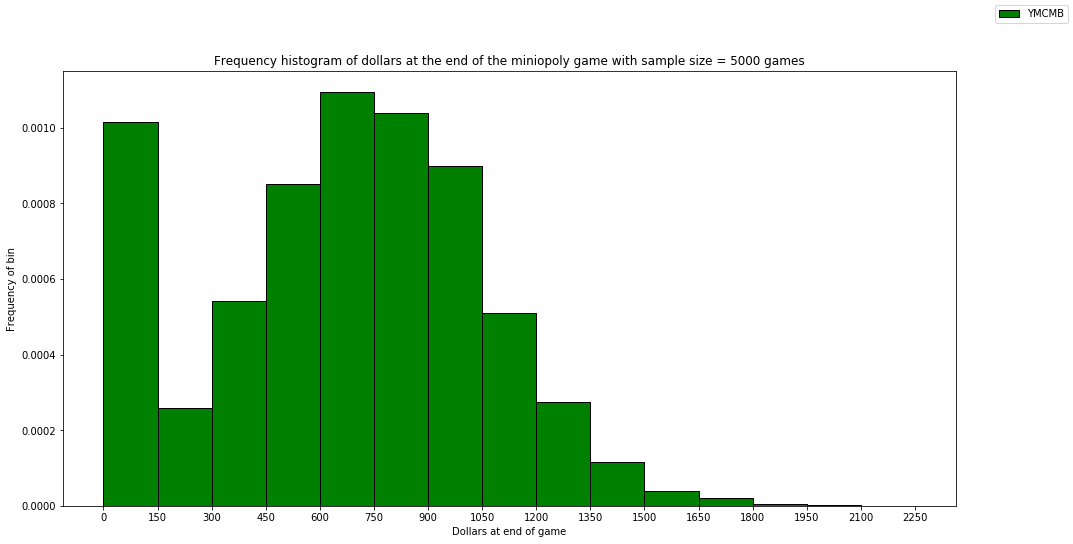

In [8]:
def simulate_end_cash(x):
    return_arr = []
    for x_range in range(x):
        some_player = Player(action_square_lookup)
        for turn_range in range(30):
            if type(some_player.status) is not GameOverStatus:
                some_player.do_turn()
            else:
                break
        return_arr.append(some_player.cash)
    return return_arr

import matplotlib.pylab as plt
game_cash = simulate_end_cash(5000)
fig, ax = plt.subplots(1,1, figsize=(16,8))
freq, bins, _ = ax.hist(game_cash,
          edgeColor = "Black",
          faceColor = "Green",
          bins = range(0,2200 + 200, 150),
           density = True,
          label = "YMCMB")
print(bins)
ax.set_xlabel("Dollars at end of game")
ax.set_ylabel("Frequency of bin")
ax.set_title("Frequency histogram of dollars at the end of the miniopoly game with sample size = 5000 games")
ax.set_xticks([i for i in range(0, 2200+150, 150)])
fig.legend()

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [9]:
prob_bankrupt_before_30 = len([gcash for gcash in game_cash if gcash == 0])/len(game_cash)
print(prob_bankrupt_before_30)

0.1378


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [15]:
#P(B | J) = P(B intersection J)/P(J)
def sim_given_jail_bankrupt(x):
    went_jail = 0
    went_jail_and_bankrupt = 0
    for x_range in range(x):
        a_player = Player(action_square_lookup)
        for turn_range in range(30):
            if type(a_player.status) is not GameOverStatus:
                a_player.do_turn()
            else:
                break
        for entry in a_player.turn_log:
            if repr(entry).find("In Jail") != -1:
                went_jail += 1
                if a_player.cash == 0:
                    went_jail_and_bankrupt += 1
                    break
                break
    return (went_jail_and_bankrupt/x)/(went_jail/x)

sim_given_jail_bankrupt(5000)

0.19254419677171408

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [21]:
#p(J | B) = P(B intersection J)/P(B)
def sim_jail_given_bankrupt(x):
    went_bankrupt = 0
    went_bankrupt_and_jail = 0
    for x_range in range(x):
        a_player = Player(action_square_lookup)
        for turn_range in range(30):
            if type(a_player.status) is not GameOverStatus:
                a_player.do_turn()
            else:
                break
        #get count(B)
        if a_player.cash == 0:
            went_bankrupt += 1
        #get count(B intersection J)
        for entry in a_player.turn_log:
            if repr(entry).find("In Jail") != -1 and a_player.cash == 0:
                went_bankrupt_and_jail += 1
                break
    return (went_bankrupt_and_jail/x)/(went_bankrupt/x)

sim_jail_given_bankrupt(5000)

0.6970128022759602

***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [28]:
import random

die_choices = [1,2,3,4,5,6]

def sim_x_rolls(x):
    close = 0
    for x_range in range(x):
        d1 = random.choice(die_choices)
        d2 = random.choice(die_choices)
        if abs(d1 - d2) <= 1:
            close += 1
    return close/x

sim_x_rolls(10000)

0.4465

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

In [143]:
import numpy as np

die = np.array([1,2,3,4,5,6])


    
#Wall Time: 13.4s
def run_trial(x):
    trial_close = np.zeros(x)
    #the only reason that we can do this is because the rolls are independent of one another. Allows us to utilize 
    #numpy and make some arrays at the beginning before we start the simulation
    close_bools = abs(np.random.choice(die, size = x) - np.random.choice(die, size = x)) <= 1
    for current_index in range(x):
            trial_close[current_index] = np.sum(close_bools[:current_index + 1]) / (current_index + 1)

#         print(f"Trial x: {current_index} | Close Bool Array: {trial_close} | d1_rolls: {d1_rolls[:current_index]} | d2_rolls: {d2_rolls[:current_index]}")
    return trial_close

#Wall time: 38.6s
def run_another_trial(x):
    trial_close = np.zeros(x)
    d1_rolls = np.random.choice(die, size = x)
    d2_rolls = np.random.choice(die, size = x)
    for current_index in range(1, x + 1):
        trial_close[current_index - 1] = np.sum(abs(d1_rolls[:current_index] - d2_rolls[:current_index]) <= 1) / current_index
    return trial_close

def run_sim(x_sims, y_trials_each, sim_func):
    sims = []
    for _ in range(x_sims):
        sims.append(sim_func(y_trials_each))
    return sims

%time run_sim(10, 50000, run_trial)
%time run_sim(10, 50000, run_another_trial)
# fig2, ax2 = plt.subplots(1,1,figsize=(18, 9))
# test_sims_1 = run_sim(1, 50, run_trial)
# for sim in test_sims_1:
#     ax2.plot(sim)
# ax2.set_xlabel("Num Trials")
# ax2.set_ylabel("Estimate of Probability")
# ax2.set_title("Stochastic Estimate of Probability of getting \"close\" rolls")

# fig2, ax2 = plt.subplots(1,1,figsize=(18, 9))
# test_sims = run_sim(1, 50, run_another_trial)
# for sim in test_sims:
#     ax2.plot(sim)
# ax2.set_xlabel("Num Trials")
# ax2.set_ylabel("Estimate of Probability")
# ax2.set_title("Stochastic Estimate of Probability of getting \"close\" rolls")

# for sim_number in range(len(sims)):
#     this_sim = sims[sim_number]
#     print(f"For trial {sim_number}, there is a {this_sim[len(sims - 1)]} probability of getting \"close\" rolls after {len(this_sim)} total rolls.")

[[2 5 2 4 2 1 1 5 1 6]
 [2 3 4 3 1 5 6 3 4 6]]


KeyboardInterrupt: 

KeyboardInterrupt: 

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)